# Week4授業前課題1 アヤメの分類

## 【課題1】練習のために特徴量とカテゴリを選択

選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。  


- virgicolorとvirginica
- sepal_lengthとpetal_length

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
dataset = load_iris()

# 説明変数をDataFrame型変数Xに格納
X = pd.DataFrame(dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])

# 目的変数をDataFrame型変数yに格納
y = pd.DataFrame(dataset.target, columns=["Species"])

In [3]:
df = pd.concat([X, y], axis=1)

In [4]:
df_select = df[['sepal_length','petal_length','Species']]
df_extract = df_select[(df['Species'] == 1) | (df['Species'] == 2)]

In [5]:
#インデックスのリセット
df_extract = df_extract.reset_index(drop=True)

In [6]:
df_extract.info

<bound method DataFrame.info of     sepal_length  petal_length  Species
0            7.0           4.7        1
1            6.4           4.5        1
2            6.9           4.9        1
3            5.5           4.0        1
4            6.5           4.6        1
..           ...           ...      ...
95           6.7           5.2        2
96           6.3           5.0        2
97           6.5           5.2        2
98           6.2           5.4        2
99           5.9           5.1        2

[100 rows x 3 columns]>

In [7]:
df_extract.describe()

,sepal_length,petal_length,Species
count,100.000000,100.000000,100.000000
mean,6.262000,4.906000,1.500000
std,0.662834,0.825578,0.502519
min,4.900000,3.000000,1.000000
25%,5.800000,4.375000,1.000000
50%,6.300000,4.900000,1.500000
75%,6.700000,5.525000,2.000000
max,7.900000,6.900000,2.000000


## 【問題2】データの分析

まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。  


ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

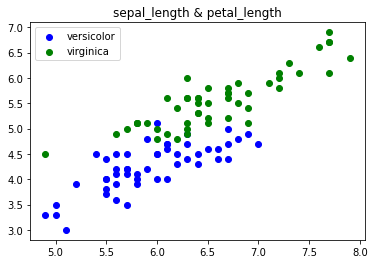

In [8]:
# 散布図
plt.title("sepal_length & petal_length")
plt.scatter(df[df['Species']==1]['sepal_length'], df[df['Species']==1]['petal_length'], c = 'blue', label="versicolor")
plt.scatter(df[df['Species']==2]['sepal_length'], df[df['Species']==2]['petal_length'], c = 'green', label="virginica")
plt.legend()
plt.show()

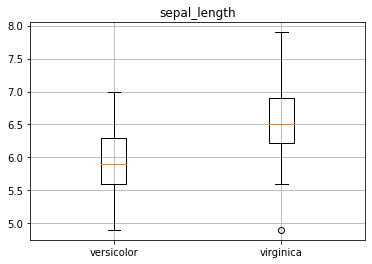

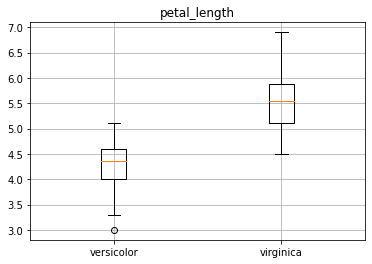

In [9]:
# 箱ひげ図（boxplot）
features = ["sepal_length", "petal_length"]

for feature in features:
    plt.boxplot([df[df["Species"]==1][feature], df[df["Species"]==2][feature]])
    plt.xticks([1, 2], ['versicolor', 'virginica'])
    plt.title(feature)
    plt.grid()
    plt.show()

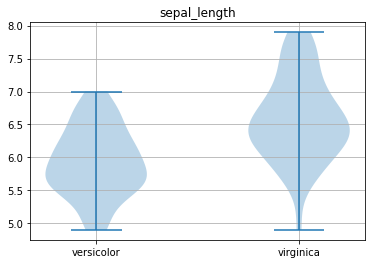

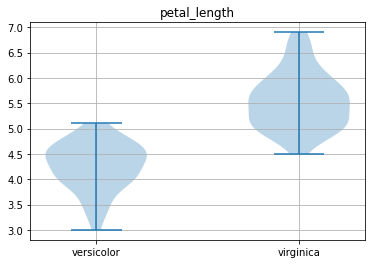

In [10]:
# バイオリン図
features = ["sepal_length", "petal_length"]

for feature in features:
    plt.violinplot([df[df["Species"]==1][feature], df[df["Species"]==2][feature]])
    plt.xticks([1, 2], ['versicolor', 'virginica'])
    plt.title(feature)
    plt.grid()
    plt.show()

## 【問題3】前処理・訓練データと検証データの分割

前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。

In [11]:
# ndarrayに変換
df_ndarray = df_extract.values

# 特徴量と目的変数を格納
X = df_ndarray[:, 0:2]
y = df_ndarray[:, 2]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [30]:
print("X_train：", np.shape(X_train))
print("X_test：", np.shape(X_test))
print("Y_train：", np.shape(y_train))
print("Y_test：", np.shape(y_test))

X_train： (75, 2)
X_test： (25, 2)
Y_train： (75,)
Y_test： (25,)


## 【問題4】前処理・標準化

分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

display(X_train_std)
display(X_test_std)

array([[-1.77029021e+00, -2.29778941e+00],
       [ 3.81787899e-02, -2.41872570e-01],
       [-5.64644209e-01,  2.41872570e-01],
       [ 1.88884540e-01,  8.46553995e-01],
       [-1.12526960e-01, -1.20936285e-01],
       [ 3.39590289e-01,  2.41872570e-01],
       [ 1.69594204e+00,  1.45123542e+00],
       [ 6.41001789e-01,  8.46553995e-01],
       [ 2.14805929e+00,  2.41872570e+00],
       [-7.15349959e-01,  2.41872570e-01],
       [ 6.41001789e-01,  1.20936285e-01],
       [-1.12526960e-01, -4.83745140e-01],
       [-2.07170171e+00, -4.83745140e-01],
       [-8.66055709e-01,  1.20936285e-01],
       [ 6.41001789e-01,  9.67490280e-01],
       [ 1.88884540e-01, -4.83745140e-01],
       [ 1.88884540e-01,  4.83745140e-01],
       [-7.15349959e-01, -1.08842656e+00],
       [-2.63232710e-01, -3.62808855e-01],
       [ 3.39590289e-01, -3.62808855e-01],
       [ 6.41001789e-01, -6.04681425e-01],
       [-7.15349959e-01, -9.67490280e-01],
       [-1.16746721e+00, -6.04681425e-01],
       [-1.

array([[ 7.91707539e-01, -1.20936285e-01],
       [ 3.81787899e-02,  8.46553995e-01],
       [ 9.42413289e-01,  2.14825997e-15],
       [ 1.99735354e+00,  2.05591684e+00],
       [ 1.39453054e+00,  1.33029913e+00],
       [ 7.91707539e-01,  1.20936285e+00],
       [-1.01676146e+00, -4.83745140e-01],
       [ 3.81787899e-02,  2.14825997e-15],
       [ 3.39590289e-01,  1.08842656e+00],
       [ 6.41001789e-01,  3.62808855e-01],
       [ 3.81787899e-02,  8.46553995e-01],
       [-7.15349959e-01,  2.41872570e-01],
       [ 1.88884540e-01,  8.46553995e-01],
       [-2.63232710e-01, -2.41872570e-01],
       [-2.07170171e+00, -1.93498056e+00],
       [-1.16746721e+00, -1.33029913e+00],
       [ 3.81787899e-02,  2.14825997e-15],
       [ 1.88884540e-01, -7.25617710e-01],
       [-4.13938459e-01,  2.41872570e-01],
       [ 4.90296039e-01, -3.62808855e-01],
       [-1.92099596e+00, -1.93498056e+00],
       [ 7.91707539e-01,  7.25617710e-01],
       [-1.16746721e+00, -1.08842656e+00],
       [-1.

## 【問題5】学習と推定

最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。  
学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。    

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# 5-nn
nn_5 = KNeighborsClassifier()
nn_5.fit(X_train_std, y_train)
y_predict = nn_5.predict(X_test_std)
y_predict

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2.,
       1., 2., 1., 1., 2., 1., 2., 1.])

In [22]:
# 1-nn
nn_1 = KNeighborsClassifier(n_neighbors=1)
nn_1.fit(X_train_std, y_train)
nn_1.predict(X_test_std)

array([1., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 1., 1., 1., 2.,
       1., 2., 1., 1., 2., 1., 2., 1.])

In [23]:
# 3-nn
nn_3 = KNeighborsClassifier(n_neighbors=3)
nn_3.fit(X_train_std, y_train)
nn_3.predict(X_test_std)

array([1., 2., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2.,
       1., 2., 1., 1., 2., 1., 2., 1.])

## 【問題6】評価

証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。


2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。


- scikit-learnを使い4種類の指標を計算する
- 混同行列をscikit-learnを使い表示する
- 4種類の指標値の意味について簡単に調査して文章でまとめる

### scikit-learnを使い4種類の指標を計算する

In [67]:
estimation_nn_5_dict = {
    "accuracy": accuracy_score(y_test, y_predict),
    "precision": precision_score(y_test, y_predict),
    "recall": recall_score(y_test, y_predict),
    "f1":f1_score(y_test, y_predict)
}

estimation_nn_5 = pd.DataFrame(estimation_nn_5_dict, index=['KNeighborsClassifier(5-nn)'])
estimation_nn_5

,accuracy,precision,recall,f1
KNeighborsClassifier(5-nn),0.88,1.0,0.769231,0.869565


### 混同行列をscikit-learnを使い表示する

In [28]:
# 混同行列（confusion matrix） 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[10,  3],
       [ 0, 12]])

### 4種類の指標値の意味について簡単に調査して文章でまとめる


Accuracy（正解率）：予測結果全体と、答えがどれぐらい一致しているかを判断する指標  
Precision（適合率）：陽性であると予測した内の何%が当たっていたかを示す  
Recall（再現率）：実際に正であるもののうち，正であると予測されたものの割合  
F値：再現率と適合率の調和平均  

## 【問題7】可視化

評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [33]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

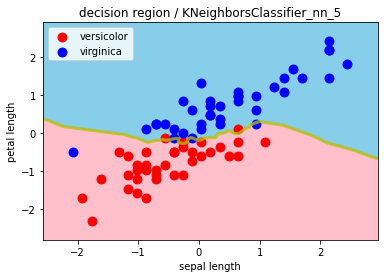

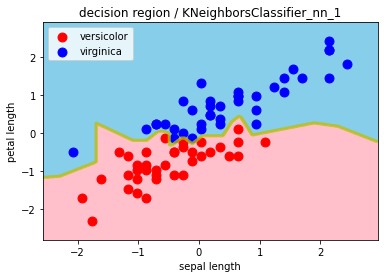

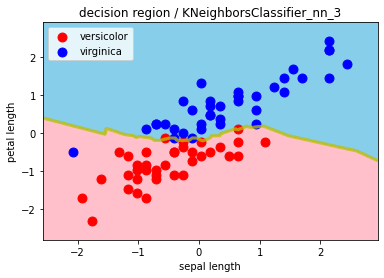

In [35]:
decision_region(X_train_std, y_train, model=nn_5, step=0.01, title='decision region / KNeighborsClassifier_nn_5',
                xlabel="sepal length", ylabel="petal length")
decision_region(X_train_std, y_train, model=nn_1, step=0.01, title='decision region / KNeighborsClassifier_nn_1',
                xlabel="sepal length", ylabel="petal length")
decision_region(X_train_std, y_train, model=nn_3, step=0.01, title='decision region / KNeighborsClassifier_nn_3',
                xlabel="sepal length", ylabel="petal length")

## 【問題8】他の手法の学習

以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

### ロジスティック回帰

/Users/kojiyakubo/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


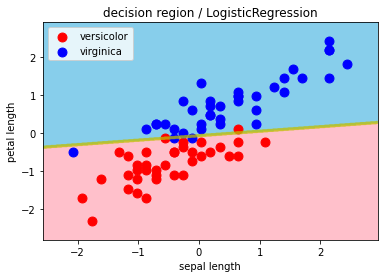

In [45]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0)
logistic.fit(X_train_std, y_train)
y_predict_logistic = logistic.predict(X_test_std)
decision_region(X_train_std, y_train, model=lreg, step=0.01, title='decision region / LogisticRegression',
                xlabel="sepal length", ylabel="petal length")

In [58]:
estimation_logistic_dict = {
    "accuracy": accuracy_score(y_test, y_predict_logistic),
    "precision": precision_score(y_test, y_predict_logistic),
    "recall": recall_score(y_test, y_predict_logistic),
    "f1":f1_score(y_test, y_predict_logistic)
}

estimation_logistic = pd.DataFrame(estimation_logistic_dict, index=['LogisticRegression'])
estimation_logistic

,accuracy,precision,recall,f1
LogisticRegression,0.92,1.0,0.846154,0.916667


### SVM

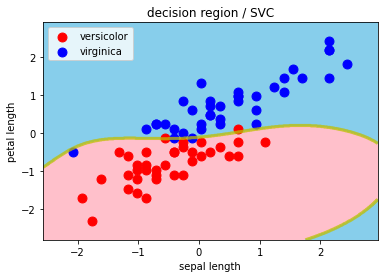

In [73]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_std, y_train)
y_predict_svc = svc.predict(X_train_std)
#  グラフ化
decision_region(X_train_std, y_train, model=svc, step=0.01, title='decision region / SVC',
                xlabel="sepal length", ylabel="petal length")

In [70]:
estimation_svc_dict = {
    "accuracy": accuracy_score(y_test, y_predict_svc),
    "precision": precision_score(y_test, y_predict_svc),
    "recall": recall_score(y_test, y_predict_svc),
    "f1":f1_score(y_test, y_predict_svc)
}

estimation_svc = pd.DataFrame(estimation_svc_dict, index=['SVC'])
estimation_svc

,accuracy,precision,recall,f1
SVC,0.92,1.0,0.846154,0.916667


### 決定木

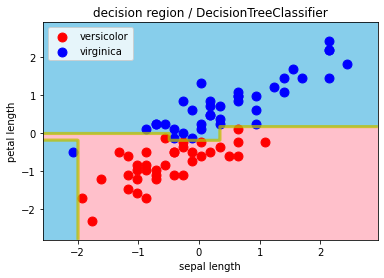

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_std, y_train)
y_predict_dtree = dtc.predict(X_test_std)
decision_region(X_train_std, y_train, model=dtc, step=0.01, title='decision region / DecisionTreeClassifier',
                xlabel="sepal length", ylabel="petal length")

In [60]:
estimation_dtc_dict = {
    "accuracy": accuracy_score(y_test, y_predict_dtc),
    "precision": precision_score(y_test, y_predict_dtc),
    "recall": recall_score(y_test, y_predict_dtc),
    "f1":f1_score(y_test, y_predict_dtc)
}
estimation_dtc = pd.DataFrame(estimation_dtc_dict, index=['DecisionTreeClassifier'])
estimation_dtc

,accuracy,precision,recall,f1
DecisionTreeClassifier,0.84,0.909091,0.769231,0.833333


### ランダムフォレスト

/Users/kojiyakubo/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


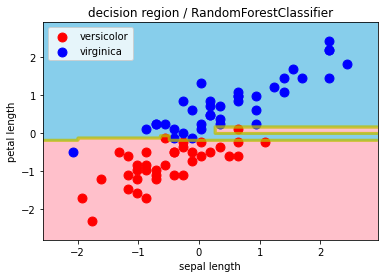

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_std, y_train)
y_predict_rfc = rfc.predict(X_test_std)
#  グラフ化
decision_region(X_train_std, y_train, model=rfc, step=0.01, title='decision region / RandomForestClassifier',
                xlabel="sepal length", ylabel="petal length")

In [65]:
estimation_rfc_dict = {
    "accuracy": accuracy_score(y_test, y_predict_rfc),
    "precision": precision_score(y_test, y_predict_rfc),
    "recall": recall_score(y_test, y_predict_rfc),
    "f1":f1_score(y_test, y_predict_rfc)
}
estimation_rfc = pd.DataFrame(estimation_rfc_dict, index=['RandomForestClassifier'])
estimation_rfc

,accuracy,precision,recall,f1
RandomForestClassifier,0.88,1.0,0.769231,0.869565


### 指標値の一覧

In [74]:
#指標を１つにまとめる
pd.concat([estimation_nn_5, estimation_logistic, estimation_svc, estimation_dtc, estimation_rfc], axis=0)


,accuracy,precision,recall,f1
KNeighborsClassifier(5-nn),0.88,1.000000,0.769231,0.869565
LogisticRegression,0.92,1.000000,0.846154,0.916667
SVC,0.92,1.000000,0.846154,0.916667
DecisionTreeClassifier,0.84,0.909091,0.769231,0.833333
RandomForestClassifier,0.88,1.000000,0.769231,0.869565


[考察]  
Accuracy（正解率）、Recall（再現率）、f1の指標で**ロジスティック回帰**と**SVM**が良好な結果でした。
決定領域はロジスティック回帰が直線、SVMが曲線、決定木とランダムフォレストは水平線と垂直線の形状です。
